Threshold: 1.1428571428571428


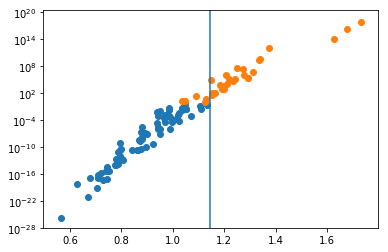

In [55]:
from linalg_helper import *
import numpy as np
import matplotlib.pyplot as plt

N = 40
M = 5
k = 200

lambd = 0

trials = 100

stable_data = []
unstable_data = []

threshold = N / (N - M)

for trial in range(trials):
    A = make_symmetric_matrix(N, 1, 1)
    A_disturb = make_symmetric_matrix(N, 0.3, 0.3)
    A_actual = A + A_disturb
    sum_lambda_squared = sum(x**2 for x in np.linalg.eigvals(A))
    x = x0 = make_random_direction(N)

    for i in range(k):
        D = make_random_subspace(N, M)
        y = D.T @ x
        u_opt = -A @ D @ y
        x = (A_actual @ x) + u_opt
     
        x *= (1 + lambd)
        
        x = np.linalg.norm(x) * make_random_direction(N)  # spin x

    pt = [sum_lambda_squared / N * (1 + lambd) ** 2, np.linalg.norm(x)]
    
    if np.linalg.norm(x) < np.linalg.norm(x0):
        stable_data.append(pt)
    else:
        unstable_data.append(pt)
        
fig = plt.figure()
ax = plt.gca()
ax.set_yscale('log')
ax.scatter(*zip(*stable_data))
ax.scatter(*zip(*unstable_data))
ax.axvline(x=threshold)

print("Threshold:", threshold)